This source code created by IndianAIProduction.com team https://indianaiproduction.com/first-deep-learning-project-fashion-mnist-classification

Video on First Deep Learning Project End to End in Hindi | Fashion-MNIST | Neural Network | Machine Learning : https://youtu.be/dht9FPog6Kk

for video tutorial visit our youtube channel www.youtube.com\IndianAIProduction


# First Deep Learning Project
##Fashion Classification


### Train Neural Network on 60,000 Fashion-MNIST Images (data in NP array)
### Test Neural Network on 10,000 Fashion-MNIST Images (data in NP array)



In [1]:
'''
class_labels:

0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot 

Classify the given input from above class using Neural Network

image shape 28 X 28 pixel ( Gray scale)

'''

'\nclass_labels:\n\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot \n\nClassify the given input from above class using Neural Network\n\nimage shape 28 X 28 pixel ( Gray scale)\n\n'

### Import Libraries

In [7]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Load Data

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [11]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
y_train[0]

9

In [15]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

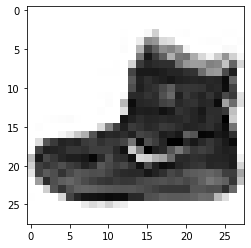

In [18]:
plt.imshow(X_train[0], cmap ="Greys")

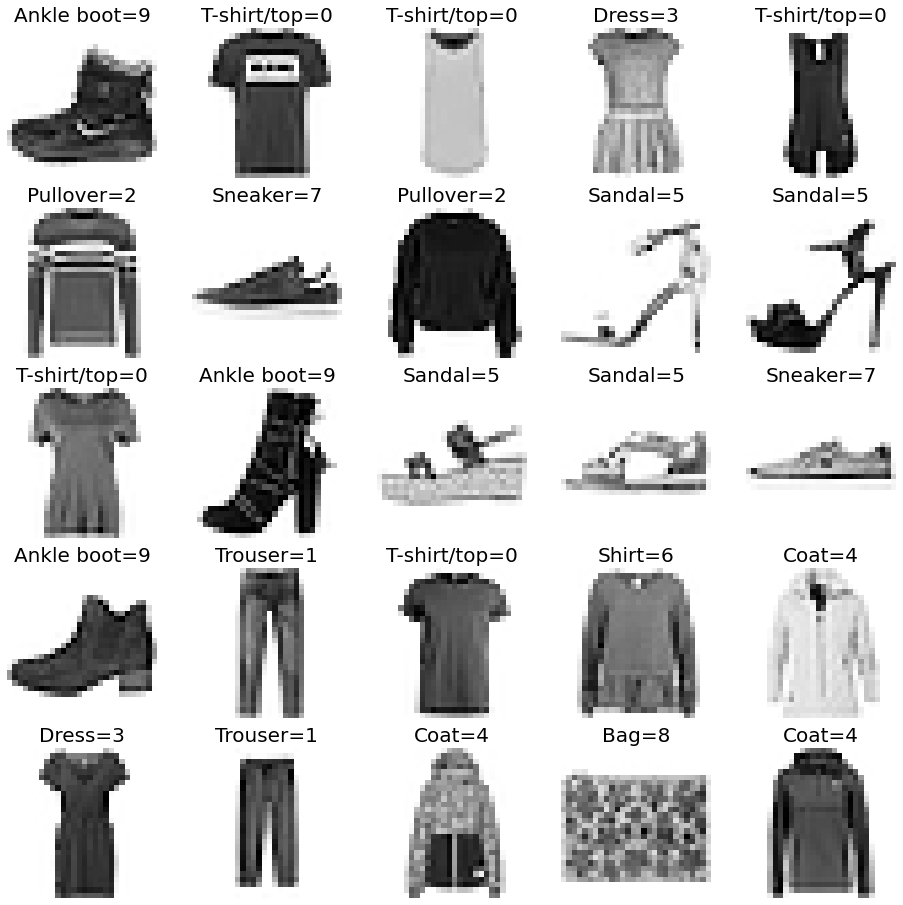

In [19]:
 plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

# Feature Scalling




In [20]:
X_train = X_train/255
X_test = X_test/255  

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build Neural Network

In [23]:
model = keras.models.Sequential([
                          #input layer
                         keras.layers.Flatten(input_shape=[28,28]),
                         #first layer
                         keras.layers.Dense(units=32, activation='relu'),
                         #relu = positive as positive -ve or zero give as zero  32 neurons in first layer
                         keras.layers.Dense(units=10, activation='softmax')
                         #10 units since we have 10 labels
                         #softmax function gives all 10 label probability  
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [25]:
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5513 - accuracy: 0.8100


In [27]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4233 - accuracy: 0.8498
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3871 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3644 - accuracy: 0.8681
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3459 - accuracy: 0.8750
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3322 - accuracy: 0.8792
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3215 - accuracy: 0.8823
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3128 - accuracy: 0.8859
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3051 - accuracy: 0.8887
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.8908
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.291

## Test and Evaluate Neural Network Model

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8657


[0.37983155250549316, 0.8657000064849854]

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.95],
      dtype=float32)

In [31]:
np.argmax(y_pred[0].round(2))

9

In [32]:
  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [33]:
y_test[0]

9

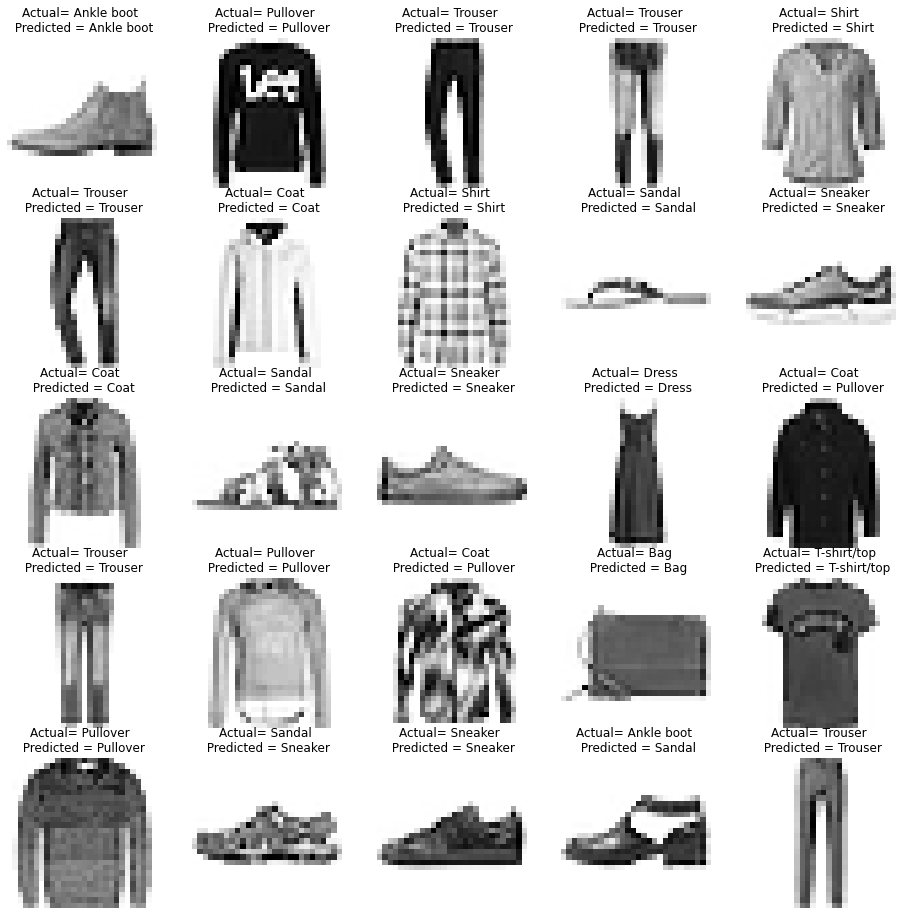

In [34]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

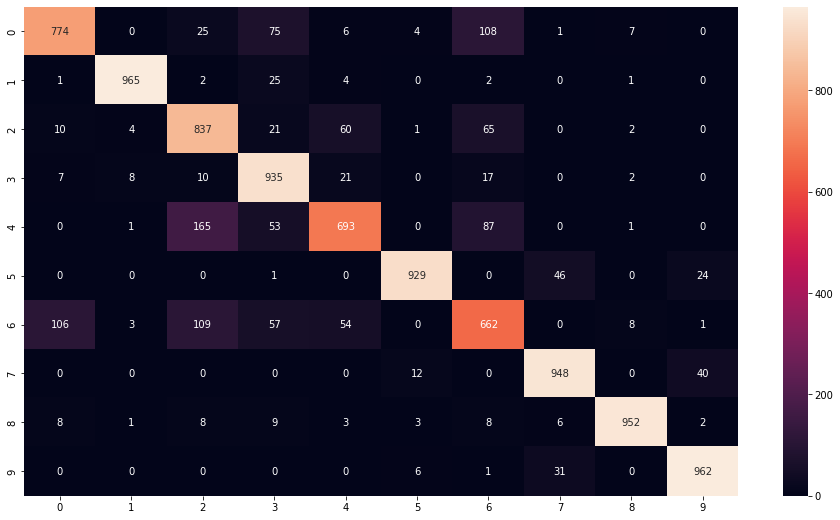

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

## Classification Report

In [37]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)

In [38]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.77      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.72      0.84      0.78      1000
       Dress       0.80      0.94      0.86      1000
        Coat       0.82      0.69      0.75      1000
      Sandal       0.97      0.93      0.95      1000
       Shirt       0.70      0.66      0.68      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.98      0.95      0.97      1000
  Ankle boot       0.93      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Save Model

In [39]:
model.save("MNIST_classifier_nn_model.h5")

In [40]:
model = keras.models.load_model("MNIST_classifier_nn_model.h5")

In [44]:
model.predict(X_test)

array([[6.7943752e-06, 6.9219880e-10, 2.5905724e-06, ..., 4.3435022e-02,
        4.8944697e-05, 9.5261407e-01],
       [2.0374283e-04, 8.2357072e-09, 9.9008501e-01, ..., 8.3053781e-18,
        1.4765824e-07, 1.2148938e-21],
       [6.7312378e-08, 9.9999809e-01, 1.4042242e-06, ..., 8.9460242e-16,
        1.3168612e-12, 3.6752350e-18],
       ...,
       [2.2330569e-02, 1.0477520e-08, 1.6767440e-02, ..., 7.3356145e-16,
        9.4220263e-01, 1.2185866e-12],
       [1.7373419e-06, 9.9991393e-01, 2.6492022e-05, ..., 1.4492926e-09,
        4.4841192e-10, 1.9647328e-10],
       [1.2691172e-04, 3.6136909e-05, 1.5496920e-04, ..., 4.6771389e-02,
        3.2315549e-04, 3.8277195e-04]], dtype=float32)